# 主城分分析PCA

在无监督学习中最常见的任务之一是降维，也就是减少输入数据的维数。为什么要降维呢？主要有一下几个原因：首先，降维可能有助于数据可视化，因为人是无法理解高维数据的，通常只能看明白二维或三维数据的可视化图像。其次，降维可以有效的解决维度灾难的问题，改善模型的训练效果。此外，降维还可以进行数据压缩，提升模型训练效率。

目前，主成分分析是最简单，最直观，最常用的降维方法之一，其工作原理主要是将的数据投影到一个正交特征子空间中。

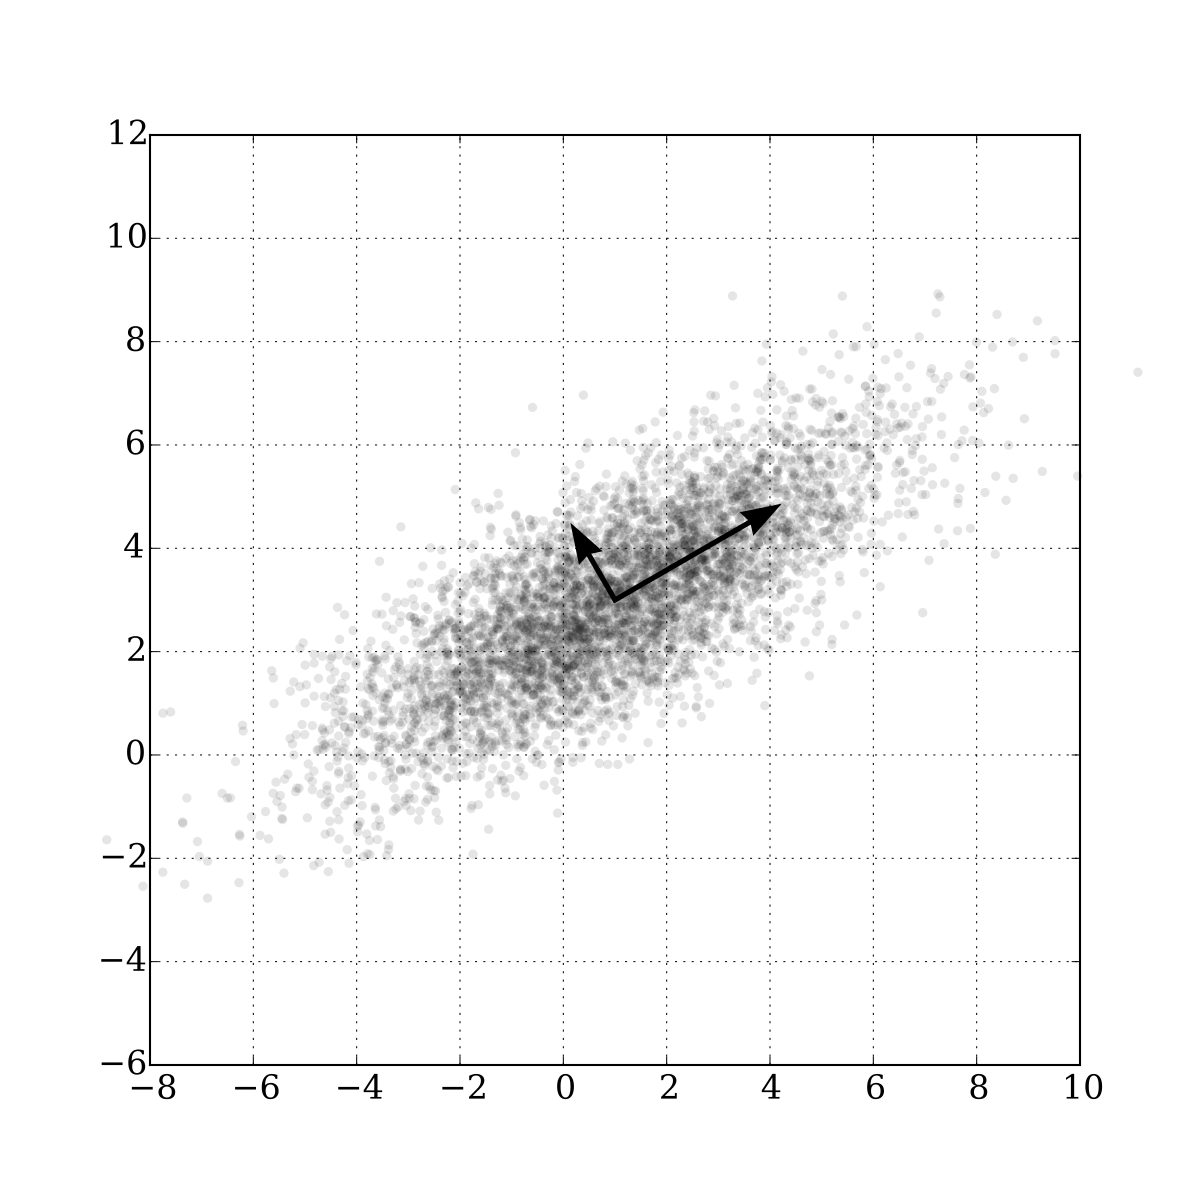

为了更好的理解 PCA 的工作原理，一起来看上面这幅图。试想一下，如果将坐标系中的数据点投影到 
$x$轴（投影过后的数据即为 $x$轴上的一堆数据点），或者以同样的方法投影到 $y$ 轴，哪一个更容易区分呢？

**莺尾花数据集**


In [2]:
from sklearn import datasets
from sklearn import decomposition
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
# 导入数据集
iris = datasets.load_iris()
x = iris.data
y = iris.target

C:\Users\change longer\AppData\Local\Temp\ipykernel_5224\1404098683.py:18: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
C:\Users\change longer\AppData\Local\Temp\ipykernel_5224\1404098683.py:19: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
C:\Users\change longer\AppData\Local\Temp\ipykernel_5224\1404098683.py:20: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])


[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

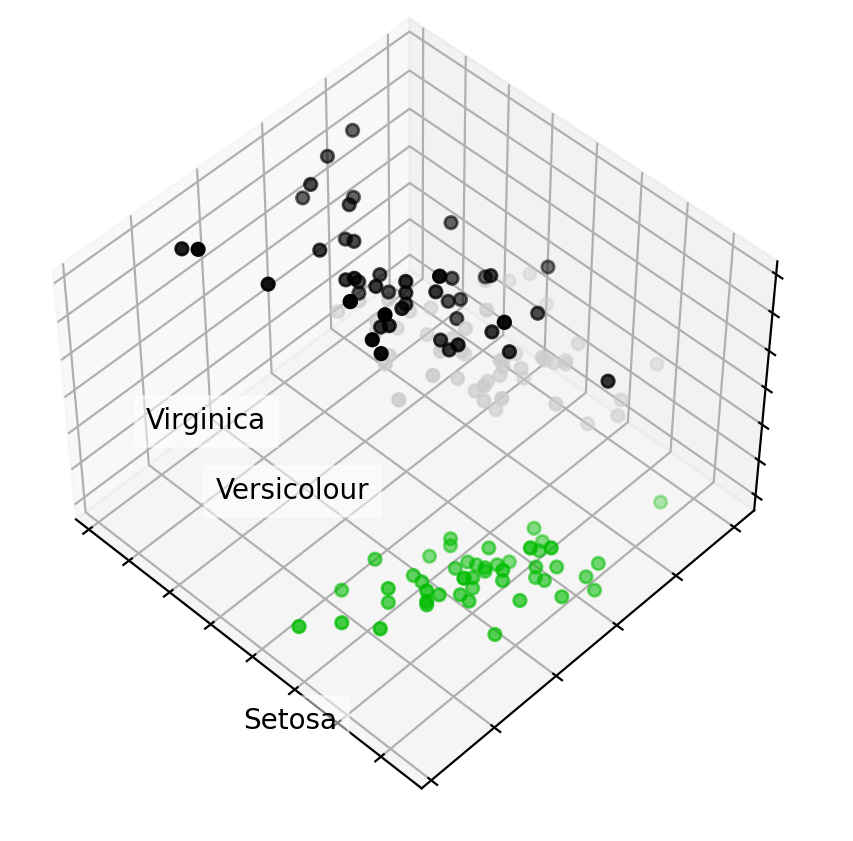

In [19]:
# 三维图画一下

fig = plt.figure(1,figsize=(6,5))
plt.clf()
ax = fig.add_subplot(111,projection='3d',elev=48,azim=134)
plt.cla
for name,label in [('Setosa',0),('Versicolour',1),('Virginica',2)]:
    ax.text(x[y==label,0].mean(),
            x[y==label,1].mean()+1.5,
            x[y==label,2].mean(),name,horizontalalignment ='center',bbox = dict(alpha=.5,edgecolor='w', facecolor='w') )
    


# 改变标签的顺序，让其与数据匹配
y_clr = np.choose(y,[1,2,0]).astype(float)
ax.scatter(x[:,0],x[:,1],x[:,2],c = y_clr,cmap = plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])



In [20]:
# 现在让我们看看使用 PCA 是怎么样提高模型的识别性能的。同样先导入实验所用到的模块。
from sklearn.tree import DecisionTreeClassifier  # 导入决策树模型、
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score  # 识别准确率计算函数


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(
    x,y,test_size=0.3,stratify=y,random_state=42)

clf = DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(x_train,y_train)
preds = clf.predict(x_test)
print('Accuracy:{:.5f}'.format(accuracy_score(y_test,preds)))

preds = clf.predict_proba(x_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                               preds.argmax(axis=1)))) # 两个是一样的



Accuracy:0.88889
Accuracy: 0.88889


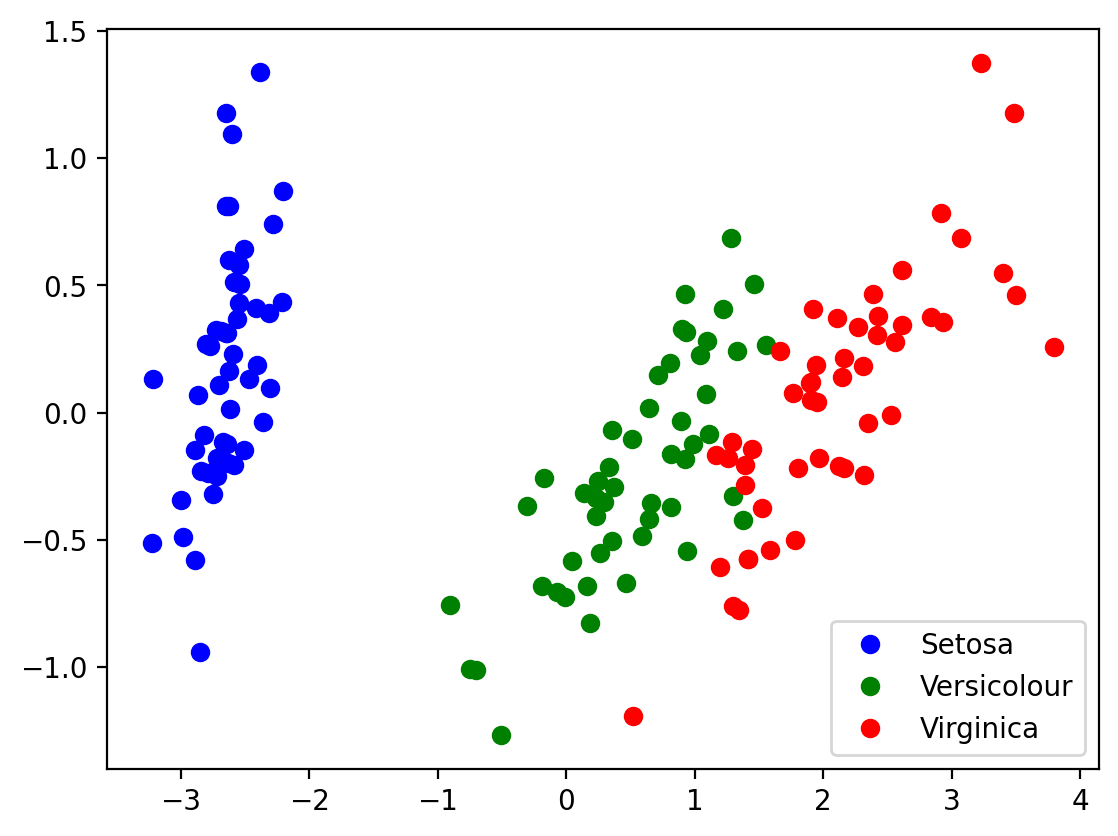

In [29]:
# 现在使用 PCA 将莺尾花数据的维度降低到 2 维，然后画出降维后的数据分布图。

pca = decomposition.PCA(n_components=2)
x_centered = x-x.mean(axis=0)

pca.fit(x_centered)
X_pca = pca.transform(x_centered)

plt.plot(X_pca[y == 0, 0], X_pca[y == 0, 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 1, 0], X_pca[y == 1, 1], 'go', label='Versicolour')
plt.plot(X_pca[y == 2, 0], X_pca[y == 2, 1], 'ro', label='Virginica')
plt.legend(loc=0)

In [30]:
# 训练集合测试集同时使用 PCA 进行降维
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=.3,
                                                    stratify=y,
                                                    random_state=42)

clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test,
                                               preds.argmax(axis=1))))

Accuracy: 0.91111


In [31]:
for i, component in enumerate(pca.components_):
    print("{} component: {}% of initial variance".format(i + 1,
                                                         round(100 * pca.explained_variance_ratio_[i], 2)))
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            iris.feature_names)))

1 component: 92.46% of initial variance
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
2 component: 5.31% of initial variance
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


**手写数字数据集**

In [32]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

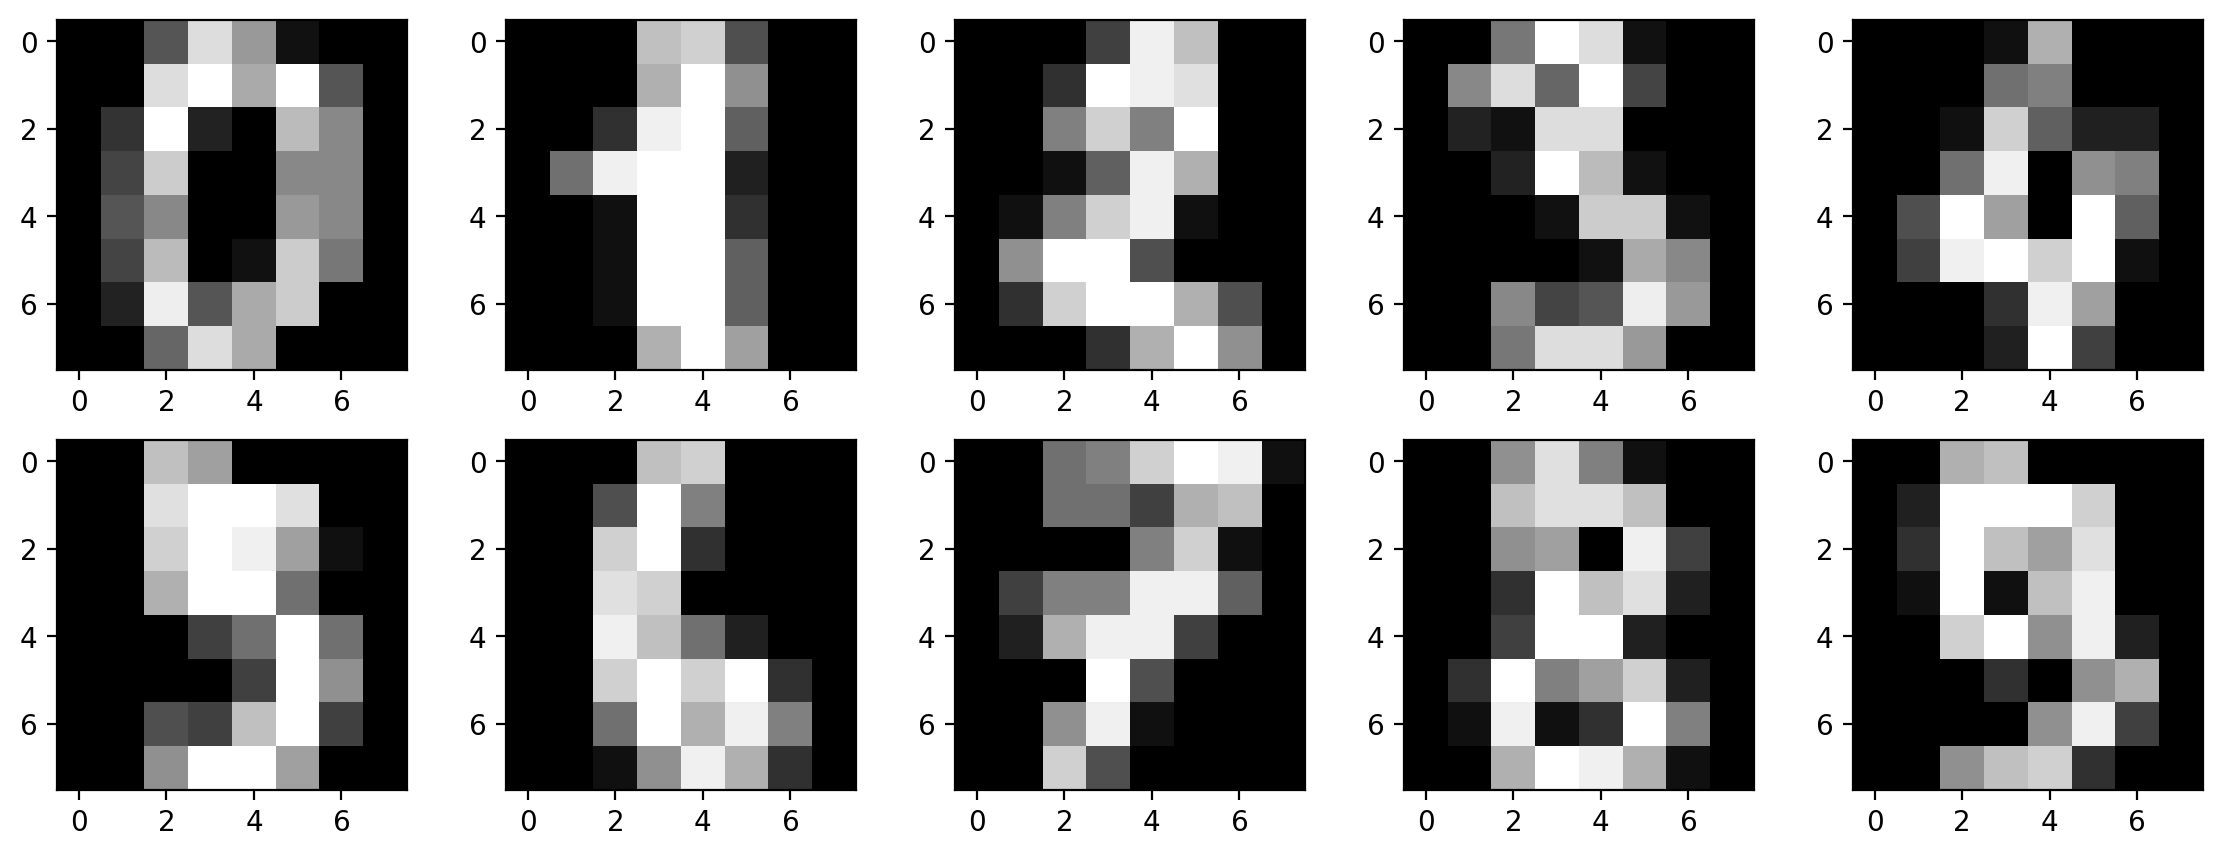

In [ ]:
plt.figure(figsize=(14,5))
for i in range(10):
    plt.subplot(2,5,i+1) # 一共两行，每一行有五个
    plt.imshow(x[i,:].reshape(8,8),cmap='gray') 
    # 手写数字体数据集的维度是 8×8 维的，即 64 维。只有将其降维减少到 2 维，
    # 才能对其进行可视化，以便查看其分布状态。


Projecting 64-dimensional data to 2D


C:\Users\change longer\AppData\Local\Temp\ipykernel_5224\2993461114.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


Text(0.5, 1.0, 'MNIST. PCA projection')

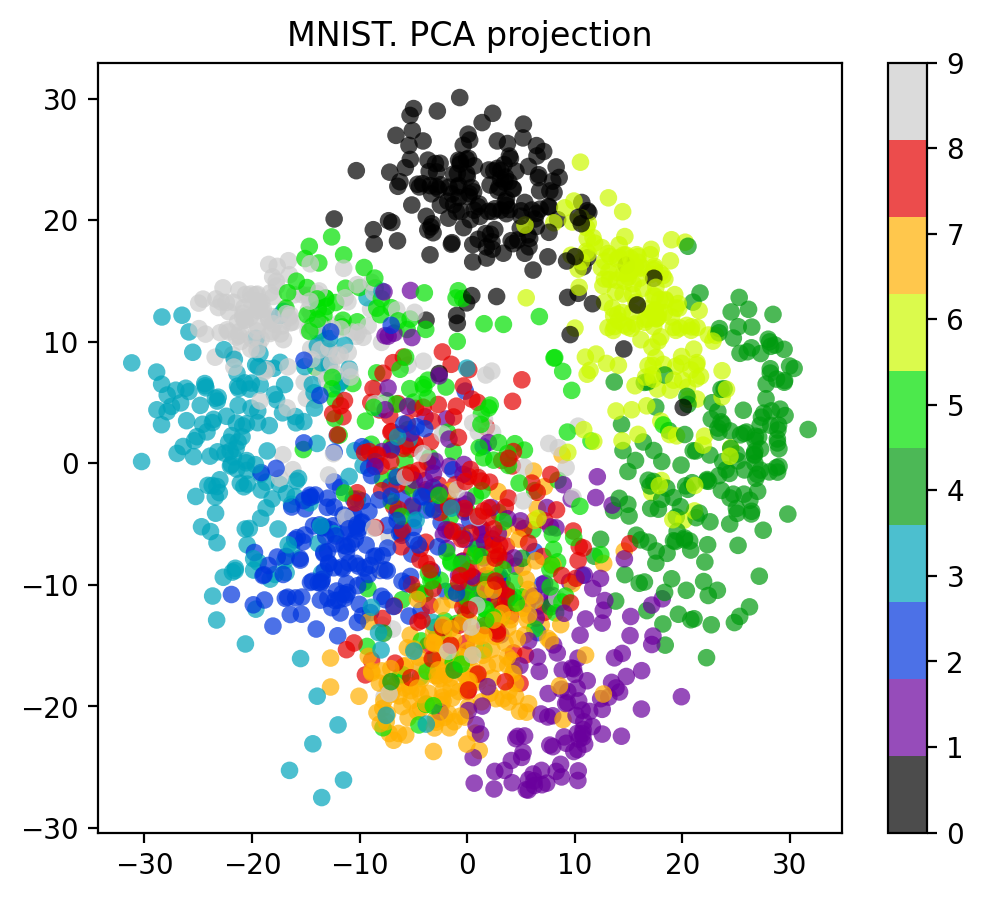

In [48]:
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(x)

print('Projecting %d-dimensional data to 2D' % x.shape[1])

plt.figure(figsize=(6, 5))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. PCA projection')

除了 PCA 之外，t-SNE 也是一种常用的降维算法。相比于 PCA，t-SNE 不具有线性约束。下面使用 t-SNE 来对手写数字体数据进行降维，并对降维后的数据进行可视化。

C:\Users\change longer\AppData\Local\Temp\ipykernel_5224\2287463167.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))


Text(0.5, 1.0, 'MNIST. t-SNE projection')

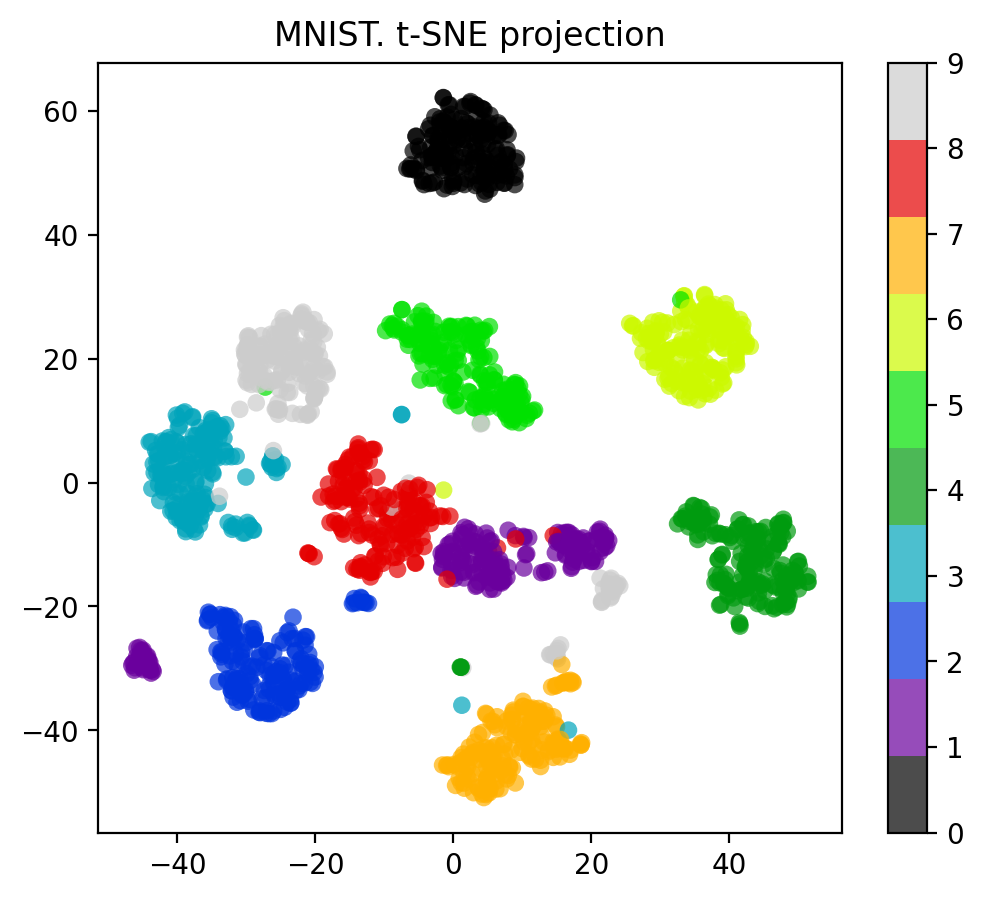

In [49]:
from sklearn.manifold import TSNE  # 导入 t-SNE

tsne = TSNE(random_state=17)
X_tsne = tsne.fit_transform(x)

plt.figure(figsize=(6, 5))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y,
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('MNIST. t-SNE projection')

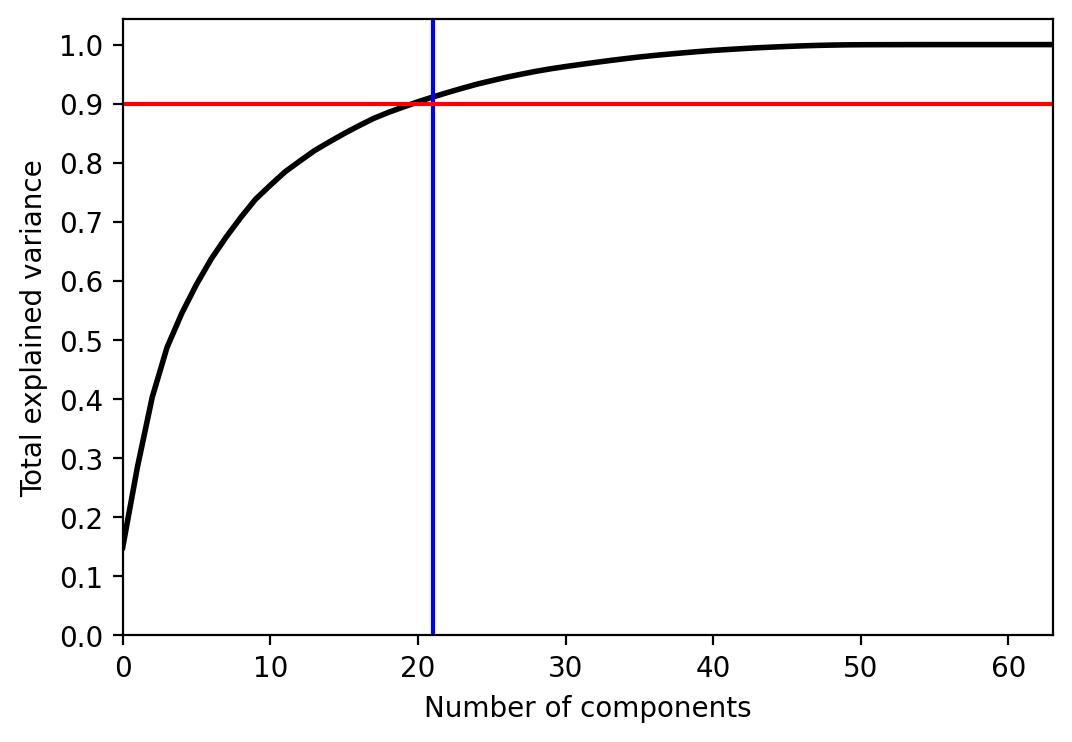

In [50]:
pca = decomposition.PCA().fit(x)

plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(21, c='b')
plt.axhline(0.9, c='r')
plt.show()